## 1. Setup the environment for plotting

In [1]:
import numpy as np
import numba as nb

from tms_tg import TMSTG

# Setting the number of threads for Numba
nb.set_num_threads(max(1, int(nb.config.NUMBA_NUM_THREADS // 1.25)))

# File with a list of paths to data locations of all animals
animalList = r'G:\Vishnu\data\TMSTG\animalList.xlsx'

# Instantiate a TMSTG object using this list
tms = TMSTG.load(animalList)

G:\Vishnu\data\TMSTG\20180922\20180922_MC_ipsi_L23_SLData_SpikeAmpTH3.0.mat successfully read
G:\Vishnu\data\TMSTG\20180922\20180922_MC_ipsi_L23_SLData_SpikeAmpTH3.0.mat closed successfully
G:\Vishnu\data\TMSTG\20180922\20180922_MC_contra_L23_SLData_SpikeAmpTH3.0.mat successfully read
G:\Vishnu\data\TMSTG\20180922\20180922_MC_contra_L23_SLData_SpikeAmpTH3.0.mat closed successfully
G:\Vishnu\data\TMSTG\20180922\20180922_MC_ipsi_L5_SLData_SpikeAmpTH3.0.mat successfully read
G:\Vishnu\data\TMSTG\20180922\20180922_MC_ipsi_L5_SLData_SpikeAmpTH3.0.mat closed successfully
G:\Vishnu\data\TMSTG\20180922\20180922_MC_contra_L5_SLData_SpikeAmpTH3.0.mat successfully read
G:\Vishnu\data\TMSTG\20180922\20180922_MC_contra_L5_SLData_SpikeAmpTH3.0.mat closed successfully
G:\Vishnu\data\TMSTG\20180922\20180922_MC_ipsi_L6_SLData_SpikeAmpTH3.0.mat successfully read
G:\Vishnu\data\TMSTG\20180922\20180922_MC_ipsi_L6_SLData_SpikeAmpTH3.0.mat closed successfully
G:\Vishnu\data\TMSTG\20180922\20180922_MC_contra

Select blocks with motor threshold value of 0.9 from all thalamic regions.

In [2]:
tms.analysis_params = {'selectionParams': {'Epoch': {'Region': 'thal'}, 'MT': '== 0.9'}}

analysis_params set to:  {'selectionParams': {'Epoch': {'Region': ('thal',), 'Animal': None, 'Layer': None, 'CoilHemVsRecHem': None, 'Mov': None, 'Depth': None}, 'MT': '== 0.9'}, 'TMSArtifactParams': {'timeWin': (-0.3, 0.5)}, 'peristimParams': {'smoothingParams': {'win': 'gaussian', 'width': 2.0, 'overlap': 0.5}, 'timeWin': (-20, 100), 'trigger': {'TMS': None}, 'baselinetimeWin': (-50, -1)}, 'lateComponentParams': {'minDelay': 10, 'method': ('std', 3)}}
----------------------------


How many such blocks exists?

In [3]:
blocks, info = tms.filter_blocks
blocks.shape

(51, 17)

Get the peri-stimulus firing activity

In [4]:
ps_FR, ps_T, ps_baseline_FR, _ = tms.psfr

psfr runs...........
Amplifier trigger channel no. 2 is empty for epoch ('20180104', 'thal', 'none', 'same', 'none', '7100'),... 
therefore using trigger channel no. 1 to remove spikes around TMSArtifact....
As the width of the trigger for this channel is 0.20000000000026527 secs, 
it is expanded to match amplifier trig width of 1.2000000000002653 secs.
Amplifier trigger channel no. 2 is empty for epoch ('20180301', 'thal', 'none', 'same', 'none', '7200'),... 
therefore using trigger channel no. 1 to remove spikes around TMSArtifact....
As the width of the trigger for this channel is 0.19999999999992724 secs, 
it is expanded to match amplifier trig width of 1.1999999999999273 secs.
Amplifier trigger channel no. 2 is empty for epoch ('20180301', 'thal', 'none', 'same', 'none', '7300'),... 
therefore using trigger channel no. 1 to remove spikes around TMSArtifact....
As the width of the trigger for this channel is 0.1999999999972988 secs, 
it is expanded to match amplifier trig width of 

## 2. Plot the peristimulus activity for all selected blocks

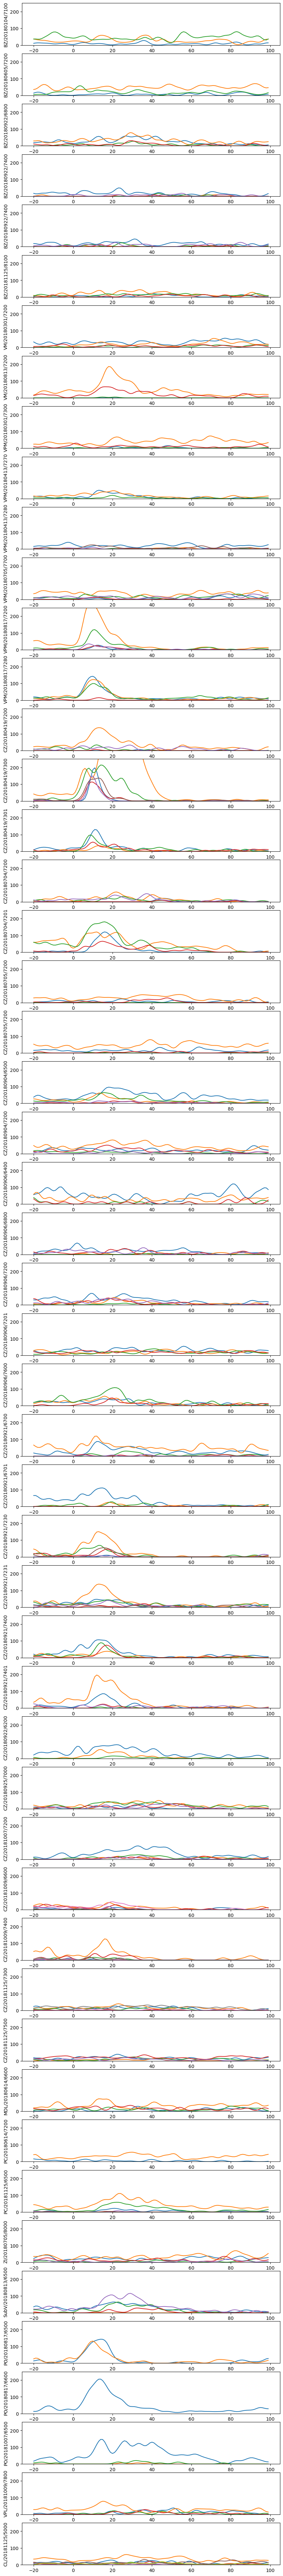

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique thalamic regions
thalRegions = blocks['RecArea '].unique()

# Get the index of blocks
index = blocks.index

# Calculate the average peristimulus firing rate for each block
avg_PSFR = [item.mean(axis=0) for item in ps_FR]

# Correct peristimulus time
ps_T_corrected = ps_T + tms.analysis_params['peristimParams']['timeWin'][0]

# Initialize an empty array to store integer indices
intIndex = np.array([], dtype=np.int64)

# Populate intIndex with indices pertaining to each unique thalamic region one after another
[intIndex := np.append(intIndex, np.where(blocks['RecArea '] == region)) for region in thalRegions]

# Create subplots of specific shape
fig, ax = plt.subplots(blocks.shape[0], 1, figsize=(10,100))

# Iterate over indices and do the corresponding plot
for i, idx in enumerate(intIndex):
    ax[i].set_ylabel(blocks.iloc[idx, 7] + '/' + index[idx][0] + '/' + index[idx][5], fontsize=10)
    ax[i].plot(ps_T_corrected, avg_PSFR[idx])
    ax[i].set_ylim(0, 250)


In [81]:
tms.analysis_params = {'selectionParams': {'Epoch': {'Region': 'thal'}, 'MT': '== 1.2'}}

analysis_params set to:  {'selectionParams': {'Epoch': {'Region': ('thal',), 'Animal': None, 'Layer': None, 'CoilHemVsRecHem': None, 'Mov': None, 'Depth': None}, 'MT': '== 1.2'}, 'TMSArtifactParams': {'timeWin': (-0.3, 0.5)}, 'peristimParams': {'smoothingParams': {'win': 'gaussian', 'width': 2.0, 'overlap': 0.5}, 'timeWin': (-20, 100), 'trigger': {'TMS': None}, 'baselinetimeWin': (-50, -1)}, 'lateComponentParams': {'minDelay': 10, 'method': ('std', 3)}}
----------------------------


In [82]:
blocks, info = tms.filter_blocks
blocks

MSO    MT  no. of Trigs  \
Animal   Region Layer CoilHemVsRecHem Mov    Depth                            
20180104 thal   none  same            none   7100     58  1.2            30   
20180301 thal   none  same            none   7200     77  1.2            50   
                                             7300     66  1.2            50   
20180413 thal   none  none            none   7270     68  1.2            50   
                                             7280     72  1.2            50   
20180419 thal   none  none            none   7300     90  1.2            50   
                                             7301     90  1.2            30   
20180605 thal   none  none            none   7200     78  1.2            50   
20180614 thal   none  none            none   6600     64  1.2            60   
                                             7200     58  1.2            50   
20180704 thal   none  none            none   7200     54  1.2            30   
                                             7201     54  1.2            30   
20180705 thal   none  opposite        none   7200     60  1.2            50   
                                             7200     60  1.2            50   
                                             7700     60  1.2            50   
                                             8000     60  1.2            50   
20180813 thal   none  none            none   6500     76  1.2            40   
                                             7200     76  1.2            40   
20180817 thal   none  none            none   6500     68  1.2            32   
                                             6600     68  1.2            30   
                                             7200     68  1.2            50   
                                             7280     68  1.2            50   
20180904 thal   none  none            none   6500     54  1.2            50   
                                             7200     54  1.2            50   
20180906 thal   none  none            none   6400     72  1.2            30   
                                             6800     72  1.2            30   
                                             7200     64  1.2            50   
                                             7201     72  1.2            50   
                                             7600     72  1.2            15   
20180921 thal   none  none            none   6700     80  1.2            30   
                                             6701     80  1.2            30   
                                             7230     80  1.2            30   
                                             7231     80  1.2            30   
                                             7400     80  1.2            30   
                                             7401     80  1.2            30   
20180922 thal   none  same            contra 6200     90  1.2            30   
                                             6800     90  1.2            30   
                                             7400     90  1.2            30   
20180925 thal   none  none            none   7000     84  1.2            30   
20181007 thal   none  none            none   6500     82  1.2            30   
                                             7200     82  1.2            34   
20181009 thal   none  none            none   6600     50  1.2            30   
                                             7400     50  1.2            30   
                                             7400     50  1.2            30   
                                             7800     50  1.2            30   
20181125 thal   none  none            none   5000     56  1.2            50   
                                             6500     56  1.2            50   
                                             7300     56  1.2            50   
                                             7500     56  1.2            50   
                       

In [83]:
ps_FR, ps_T, ps_baseline_FR, _ = tms.psfr

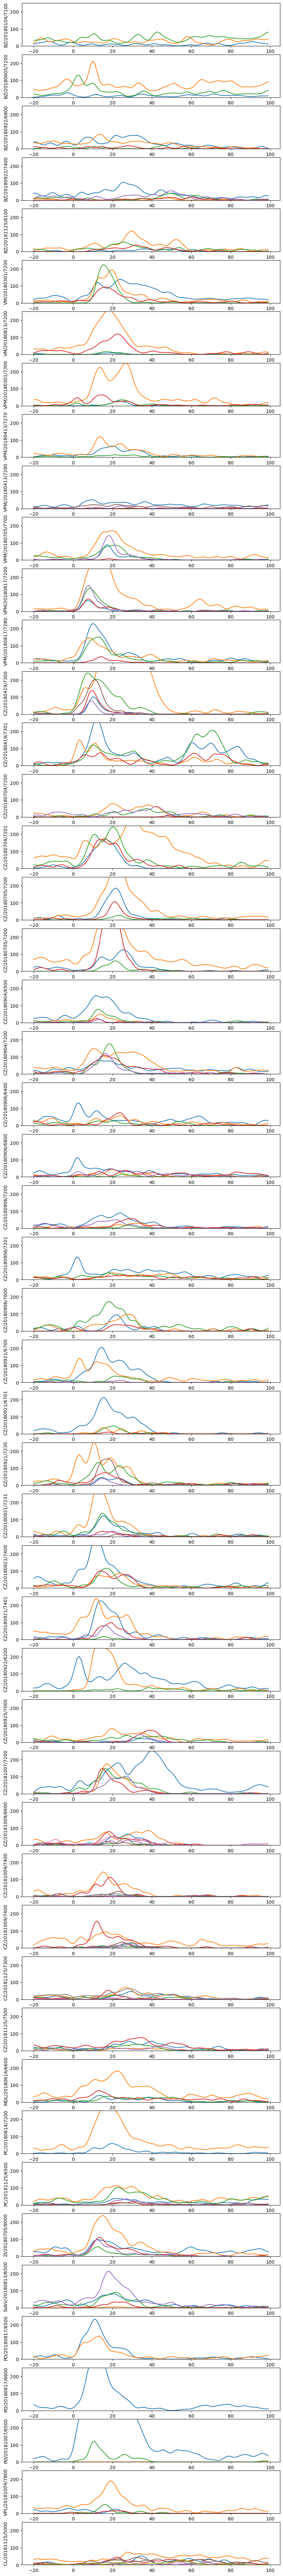

In [119]:
thalRegions = blocks['RecArea '].unique()
index = blocks.index
avg_PSFR = [item.mean(axis=0) for item in ps_FR]
ps_T_corrected = ps_T + tms.analysis_params['peristimParams']['timeWin'][0]
fig, ax = plt.subplots(blocks.shape[0], 1, figsize=(10,100))
intIndex = np.array([], dtype=np.int64)
[intIndex := np.append(intIndex, np.where(blocks['RecArea '] == region)) for region in thalRegions]
for i, idx in enumerate(intIndex):
    ax[i].set_ylabel(blocks.iloc[idx, 7] + '/' + index[idx][0] + '/' + index[idx][5], fontsize=10)
    ax[i].plot(ps_T_corrected, avg_PSFR[idx])
    ax[i].set_ylim(0, 250)

In [86]:
tms.analysis_params = {'selectionParams': {'Epoch': {'Region': 'thal'}, 'MT': '== 1.0'}}

analysis_params set to:  {'selectionParams': {'Epoch': {'Region': ('thal',), 'Animal': None, 'Layer': None, 'CoilHemVsRecHem': None, 'Mov': None, 'Depth': None}, 'MT': '== 1.0'}, 'TMSArtifactParams': {'timeWin': (-0.3, 0.5)}, 'peristimParams': {'smoothingParams': {'win': 'gaussian', 'width': 2.0, 'overlap': 0.5}, 'timeWin': (-20, 100), 'trigger': {'TMS': None}, 'baselinetimeWin': (-50, -1)}, 'lateComponentParams': {'minDelay': 10, 'method': ('std', 3)}}
----------------------------


In [90]:
blocks_thres, info = tms.filter_blocks
blocks_thres

MSO    MT  no. of Trigs  \
Animal   Region Layer CoilHemVsRecHem Mov    Depth                            
20180104 thal   none  same            none   7100     48  1.0            30   
20180301 thal   none  same            none   7200     65  1.0            50   
                                             7300     55  1.0            50   
20180413 thal   none  none            none   7270     57  1.0            50   
                                             7280     60  1.0            50   
20180419 thal   none  none            none   7300     75  1.0            50   
                                             7301     75  1.0            30   
20180605 thal   none  none            none   7200     65  1.0            50   
20180614 thal   none  none            none   6600     53  1.0            50   
                                             7200     48  1.0            50   
20180704 thal   none  none            none   7200     45  1.0            30   
                                             7201     45  1.0            30   
20180705 thal   none  opposite        none   7200     50  1.0            50   
                                             7200     50  1.0            50   
                                             7700     50  1.0            50   
                                             8000     50  1.0            50   
20180813 thal   none  none            none   6500     63  1.0            33   
                                             7200     63  1.0            40   
20180817 thal   none  none            none   6500     57  1.0            30   
                                             6600     57  1.0            30   
                                             7200     57  1.0            50   
                                             7280     57  1.0            50   
20180904 thal   none  none            none   6500     45  1.0            50   
                                             7200     45  1.0            50   
20180906 thal   none  none            none   6400     60  1.0            26   
                                             6800     60  1.0            30   
                                             7200     53  1.0            50   
                                             7201     60  1.0            50   
                                             7600     60  1.0            30   
20180921 thal   none  none            none   6700     67  1.0            30   
                                             6701     67  1.0            30   
                                             7230     67  1.0            30   
                                             7231     67  1.0            30   
                                             7400     67  1.0            30   
                                             7401     67  1.0            30   
20180922 thal   none  same            contra 6200     75  1.0            30   
                                             6800     75  1.0            30   
                                             7400     75  1.0            30   
20180925 thal   none  none            none   7000     70  1.0            34   
20181007 thal   none  none            none   6500     68  1.0            30   
                                             7200     68  1.0            30   
20181009 thal   none  none            none   6600     42  1.0            30   
                                             7400     42  1.0            52   
                                             7800     42  1.0            30   
20181124 thal   none  none            none   7300     45  1.0            50   
                                             7400     45  1.0            50   
20181125 thal   none  none            none   5000     47  1.0            50   
                                             6500     47  1.0            50   
                                             7300     47  1.0            50   
                       

In [105]:
blocks_index = blocks.index.to_list()

In [107]:
blocks_thres_index = blocks_thres.index.to_list()

In [113]:
set(blocks_thres_index) - set(blocks_index)

{('20181124', 'thal', 'none', 'none', 'none', '7300'),
 ('20181124', 'thal', 'none', 'none', 'none', '7400')}

In [117]:
max([item.max() for item in avg_PSFR])

619.1069093777289

In [115]:
avg_PSFR[0].shape

(120, 3)

In [128]:
np.array([])

array([], dtype=float64)